In [1]:
import numpy as np
import pandas
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from scipy import ndimage
from skimage import measure

In [2]:
dataf = pandas.read_csv(r'letter-recognition.csv')

In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
help_ar = []
for i in range(len(dataf["letter"])):
    help_ar.append(ord(dataf["letter"][i])-64)
#y = help_ar
#dataf.pop("letter")
y = dataf.pop("letter")
#dataf.info()


In [6]:
scaler = MinMaxScaler()
scaler.fit(dataf)
dataf = pandas.DataFrame(scaler.transform(dataf),columns=dataf.columns)
#y = dataf.pop("letter")
x = dataf
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.268237,0.469033,0.341457,0.358163,0.233723,0.459840,0.500030,0.308573,0.345243,0.552137,0.430267,0.528600,0.203073,0.555923,0.246117,0.520080
std,0.127547,0.220304,0.134305,0.150759,0.146031,0.135069,0.155024,0.179998,0.158722,0.165898,0.175405,0.138708,0.155503,0.103115,0.171138,0.107831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.333333,0.266667,0.266667,0.133333,0.400000,0.400000,0.200000,0.266667,0.466667,0.333333,0.466667,0.066667,0.533333,0.133333,0.466667
50%,0.266667,0.466667,0.333333,0.400000,0.200000,0.466667,0.466667,0.266667,0.333333,0.533333,0.400000,0.533333,0.200000,0.533333,0.200000,0.533333
75%,0.333333,0.600000,0.400000,0.466667,0.333333,0.533333,0.600000,0.400000,0.466667,0.666667,0.533333,0.600000,0.266667,0.600000,0.333333,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

C:\Users\Jakub\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of samples')

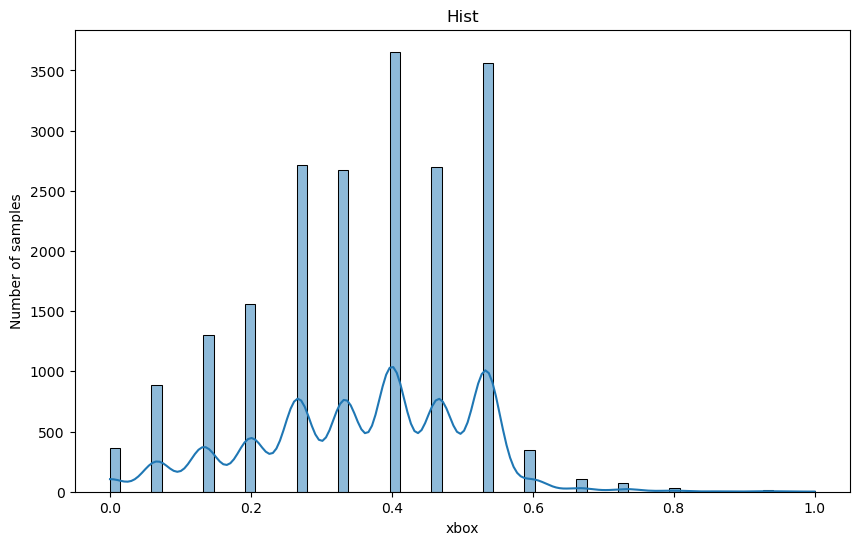

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(dataf["height"], kde = True)
plt.title("Hist")
plt.xlabel('xbox')
plt.ylabel('Number of samples')
#plt.show()

In [9]:
#dodatkowe funckje pomocnice dla tl2

def xed(np_img):
    edge_count = 0
    position_count = 0
    for index, row in enumerate(np_img):
        prev_pixel=0
        for pixel in row:
            if pixel < 255 and prev_pixel == 255:
                edge_count += 1
                position_count += len(np_img) - index
            prev_pixel = pixel
        if prev_pixel < 255: #jezeli ostatni pixel jest "on" to doliczam tez krawedz z granica
            edge_count += 1
            position_count += len(np_img) - index
    return edge_count, position_count
            
def yed(np_img):
    edge_count = 0
    position_count = 0
    for index, col in enumerate(np_img.T):
        prev_pixel = 0
        for pixel in reversed(col):
            if pixel < 255 and prev_pixel == 255:
                edge_count += 1
                position_count += len(np_img.T) - index
            prev_pixel = pixel
        if prev_pixel < 255: #jezeli ostatni pixel jest "on" to doliczam tez krawedz z granica
            edge_count += 1
            position_count += len(np_img.T) - index
    return edge_count, position_count

In [10]:
#drugie podejscie do zamiany obrazkow na dane tym razem zgodnie z tym artykulem
def tl2(filepath):
    
    img = Image.open(filepath)
    base_width = 27
    wpercent = (base_width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
    
    img_gs = img.convert("L")
    np_img = np.array(img_gs)
    
    on_pixels = np.where(np_img<255)
    on_pixels = np.array(on_pixels).T #added later

    #tutaj uznalem ze moze lepiej bedzie najpierw policzyc koordynaty wszystkie a potem dopiero je znormalizowac
    xbox = (np.max(on_pixels[:, 1]) + np.min(on_pixels[:, 1])) / 2
    ybox = (np.max(on_pixels[:, 0]) + np.min(on_pixels[:, 0])) / 2
    width = np.max(on_pixels[:, 1]) - np.min(on_pixels[:, 1])
    height = np.max(on_pixels[:, 0]) - np.min(on_pixels[:, 0])
    onpix = len(on_pixels)
    xbar = (np.mean(on_pixels[:, 1]) - (xbox + 0.5*width)) / width
    ybar = (np.mean(on_pixels[:, 0]) - (ybox + 0.5*height)) / height
    
    #zmienne pomocnicze
    xd_square = [] #kwadraty odleglosci od srodka pudelka poziome i pionowe
    yd_square = []
    x_distance = []
    y_distance = []
    xy_distance = []

    x2y_d = []
    xy2_d = []
    for i in range(len(on_pixels[:, 1])):
        xd_square.append((on_pixels[:, 1][i] - (xbox))**2)
        yd_square.append((on_pixels[:, 0][i] - (ybox))**2)
        x_distance.append((on_pixels[:, 1][i] - (xbox)))
        y_distance.append((on_pixels[:, 0][i] - (ybox)))
        xy_distance.append(x_distance[i] * y_distance[i])
        x2y_d.append(xd_square[i] * y_distance[i])
        xy2_d.append(yd_square[i] * x_distance[i])
    
    x2bar = np.mean(xd_square)
    y2bar = np.mean(yd_square)
    xybar = np.mean(xy_distance)
    x2ybar = np.mean(x2y_d)
    xy2bar = np.mean(xy2_d)
    
    #te cztery jeszcze nie sa zaimplementowane
    (xedge, xedgey) = xed(np_img)
    (yedge, yedgex) = yed(np_img)
    xedge = xedge/width
    yedge = yedge/height
    
    
    return [xbox, ybox, width, height, onpix, xbar, ybar, x2bar, y2bar, xybar, x2ybar, xy2bar, xedge, xedgey, yedge, yedgex]

In [11]:
def norm(df):
    norm_df = df.copy()
    columns_to_normalize = df.columns

    for column in columns_to_normalize:
        min_val = norm_df[column].min()
        max_val = norm_df[column].max()
    
        norm_df[column] = (norm_df[column] - min_val) / (max_val - min_val)
    return norm_df
    


In [12]:
df = pandas.read_csv(r'letter-recognition-new.csv')
yorg = df.pop('letter')

In [13]:

ndf = norm(df)
ndf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.586128,0.543083,0.524510,0.306970,0.286129,0.420675,0.464089,0.364293,0.353729,0.600830,0.524696,0.477625,0.050370,0.217295,0.553654,0.457717
std,0.138965,0.131742,0.151968,0.161647,0.148915,0.131905,0.141193,0.193492,0.167737,0.141107,0.128581,0.144335,0.081823,0.157095,0.177987,0.172737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.454545,0.435897,0.166667,0.179971,0.348439,0.422000,0.228697,0.238685,0.509145,0.476327,0.401711,0.025886,0.084426,0.425824,0.330840
50%,0.600000,0.545455,0.538462,0.277778,0.264151,0.458162,0.485688,0.330308,0.332431,0.640120,0.554065,0.507110,0.036977,0.205860,0.556452,0.451669
75%,0.700000,0.636364,0.615385,0.388889,0.364296,0.480348,0.518516,0.485757,0.441216,0.670023,0.579849,0.539909,0.052870,0.280648,0.679894,0.582278
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

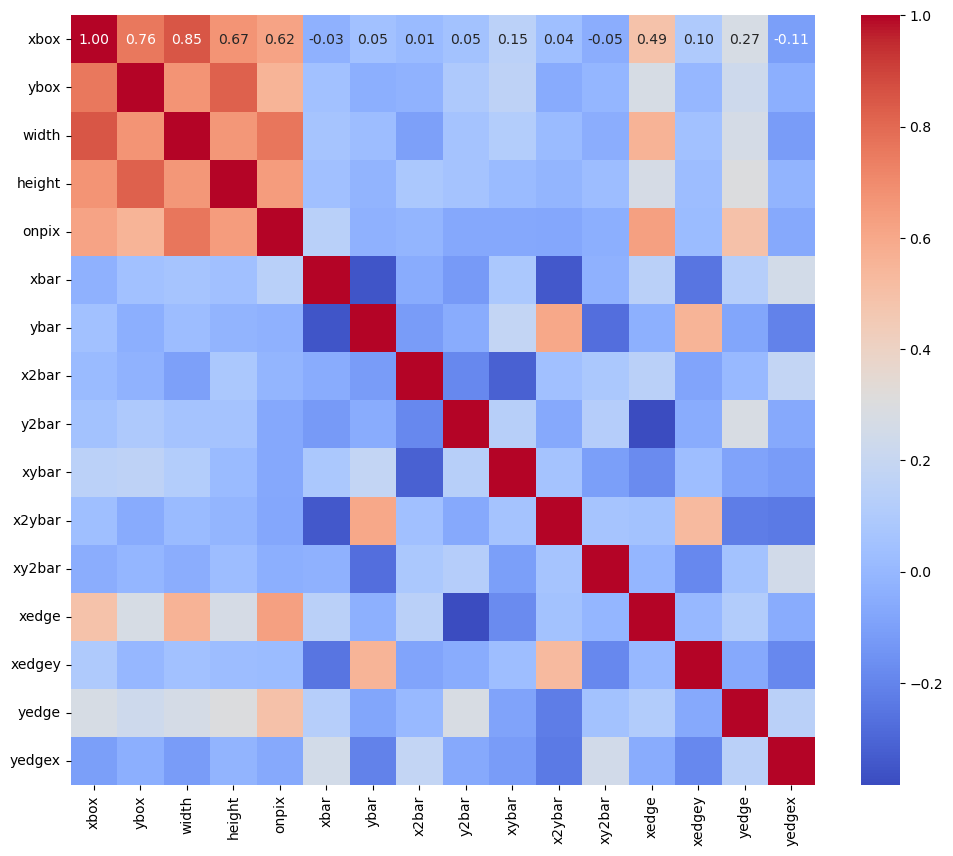

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show

In [15]:
from sklearn.neighbors import KNeighborsClassifier


best_k = 1
for i in range(1, 100):
    knn_best=KNeighborsClassifier(best_k)
    knn_best.fit(x_train, y_train)
    knn_lib=KNeighborsClassifier(i)
    knn_lib.fit(x_train, y_train)
    
    if(knn_best.score(x_test, y_test) < knn_lib.score(x_test, y_test)):
        best_k = i


knn_lib=KNeighborsClassifier(best_k)
knn_lib.fit(x_train, y_train)
knn_lib.score(x_test, y_test)



0.964

In [16]:
knn_lib.score(ndf, yorg)

0.0968944099378882

<function matplotlib.pyplot.show(close=None, block=None)>

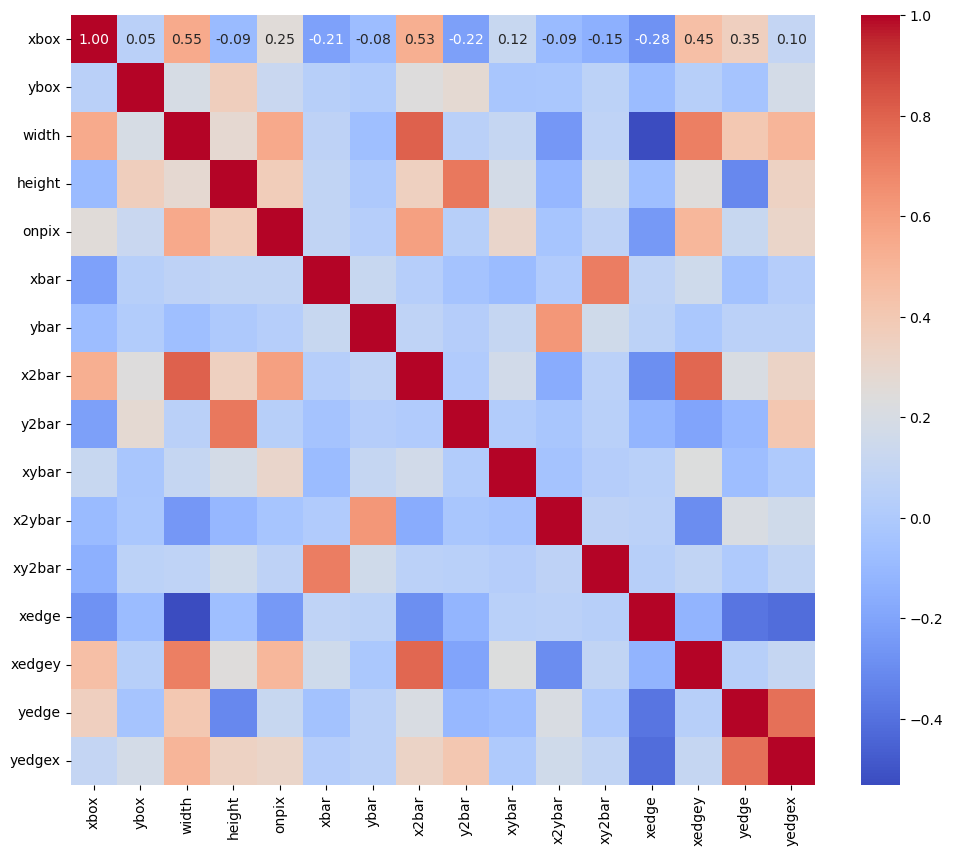

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(ndf.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show